<a href="https://colab.research.google.com/github/YasuharuSuzuki/24_programing2/blob/main/" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pandasに関する問題

## 用語の理解を問う問題
- 以下の問題について、正解となる選択肢を出力してください

### 問題10 (3点)
- dropna() メソッドの主な用途は何ですか？
    1. データフレームの特定の列を削除する
    2. データフレームから欠損値を含む行または列を削除する
    3. データフレームのインデックスをリセットする
    4. データフレームの重複した行を削除する

In [2]:
# 正解を出力してください
print('2') # dropna() メソッドは、欠損値を含む行または列を削除するために使用します。
# 1. drop() メソッドの説明です。
# 3. reset_index() メソッドの説明です。
# 4. drop_duplicates() メソッドの説明です。

2


### 問題11 (3点)
- 以下のコードは `LabelEncoder` を使って処理を行っています。

```python
from sklearn.preprocessing import LabelEncoder

categories = ['red', 'blue', 'green', 'blue', 'red']
encoder = LabelEncoder()
encoded_categories = encoder.fit_transform(categories)
print(encoded_categories)
```

上記のコードの目的として、最も適切なものを選べ

  1. カテゴリ変数を標準化してスケーリングする  
  2. カテゴリ変数を一意な整数値に変換する  
  3. カテゴリ変数の順序を定義する  
  4. カテゴリ変数の欠損値を補完する

In [3]:
# 正解を出力してください
print('2')  # `LabelEncoder` はカテゴリ変数を一意な整数値に変換するために使用します。この変換は、機械学習アルゴリズムがカテゴリ変数を処理できるようにするために行います。`fit_transform()` メソッドは、カテゴリ変数のリストを整数値に変換し、その結果を返します。

2


## プログラムを書く問題
- Auto-MPG-prediction のデータセットを使って、データの読み込み、データの確認、データの可視化を行ってください。

### Auto-MPG-prediction データセット
- 自動車のシリンダー数、馬力、重量等から、燃費を推測するデータセットです。
- `data/auto_mpg_customized.csv` のデータを読み込んで処理して行きましょう。
- 各列の名称と内容は以下の通りです。([Githubの情報](https://github.com/Munees11/Auto-MPG-prediction?tab=readme-ov-file#features-on-data-set)から抜粋)

| Variable | Definition |
| --- | --- |
| mpg | Taget Variable. contains the fuel consumption value(in Miles per Gallon) for car. |
| cylinders | contains the number of cylinders present in the car |
| displacement | contains the Displacement of the car |
| horsepower | contains the Horsepower of the car |
| weight | contains the weight of the car |
| acceleration | contains the Acceleration of the car |
| model_year | contains the model year of the car |
| origin | contains the origin country which car belong to |
| car_name | contains the name of the car(Brand-Model-Variant) |

### 問題12 Auto-MPG-prediction データセットを読み込む (6点)

In [4]:
# ライブラリのimport
import pandas as pd # pandasモジュールを読み込む（データ分析ライブラリ）
import matplotlib.pyplot as plt # 可視化ライブラリ
import seaborn as sns # Seabornモジュールを読み込む（可視化ライブラリ。pairplotなど多くのデータ分析情報をplotするのに向いている）

In [ ]:
# drive.mount()を使用してGoogleDriveをMount
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# os.chdir()を使用してカレントディレクトリを変更。作成したショーットカット名を使ってパスを指定します。
import os
os.chdir('/content/drive/MyDrive/＜作成したショートカット名＞')

In [5]:
# データファイルパス定義
AUTO_MPG_CSV = "./data/auto_mpg_customized.csv"

In [6]:
# read_csvを使ってcsvを読み込みます
df_auto1 = pd.read_csv(AUTO_MPG_CSV, index_col=0) # Auto-MPG-prediction データセットにindexがあるため、0で読み込みます

### 問題13 読み込んだDataFrameを確認(12点)
- 以下のいずれかの確認作業を少なくとも３つ行って、それぞれに最低１つの簡単な考察をつけてみましょう
  - ざっと眺める
  - カテゴリカル変数の確認
  - 行数、列数、データ型、欠損値の確認
  - 基本統計量の確認

In [7]:
# 先頭５行のデータをざっと眺める
df_auto1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
1,18.0,8,307.0,130.0,3504,12.0,70,USA,chevrolet chevelle malibu
2,15.0,8,350.0,165.0,3693,11.5,70,USA,buick skylark 320
3,18.0,8,318.0,150.0,3436,11.0,70,USA,plymouth satellite
4,16.0,8,304.0,150.0,3433,12.0,70,USA,amc rebel sst
5,17.0,8,302.0,140.0,3449,10.5,70,USA,ford torino


- origin がカテゴリカル変数ですね。
- car name は特徴量として使えそうな情報かどうか精査が必要です。
- 目的変数はmpgですね

In [8]:
# 行数、列数、データ型、欠損値の確認
df_auto1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 1 to 398
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 31.1+ KB


- horsepowerが欠損値多めですが、6件と影響少なそうなのでそのまま削除しても良さそうです

In [9]:
# 基本統計量の確認
df_auto1.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


- mpg(燃費), displacement(排気量), horsepower(馬力), weight(車両重量), acceleration(加速)はそれぞれ外れ値がありそうです
  - 因果関係として、displacement, horsepower, weightは要因、mpgやaccelerationは結果のような関係なので、それぞれの数値は何らかの関係性は有してしまうと考える
  - 相関関係を見てみたい
- 一方でmodel_yearに関しては外れ値のような分布は見られず。一様分布でデータが格納されていそうである
- cylindersは少ない系統（３～４）と多い系統（８）の２系統に分かれる。

In [10]:
# カテゴリカル変数を確認していく
df_auto1['origin'].value_counts()

origin
USA       249
Japan      79
Europe     70
Name: count, dtype: int64

- 3種のみで、結構な不均衡データです

In [11]:
df_auto1['car_name'].value_counts()

car_name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

- こちらは非常に多い。そのままでは使いにくそう。
- 空白区切りで、ford や toyota などが見られるので、メーカーの名称は取り出せそうで、上手く行くと特徴量になり得るかもしれない

### 問題14 欠損値の対策(6点)
- 欠損値の対策をしましょう

In [12]:
# 欠損値対策1
# 唯一欠損値を持つ horsepower が連続値のため、真面目に埋めるには少し難易度が高く、時間もかかる。
# 欠損値を持つ行をざっくり削除して進めることとする
df_auto2 = df_auto1.dropna(how='any')  # how='any'は全ての列のうちどれか１つでも欠損値を含む行を対象とすることを指定しています

In [13]:
# 欠損値が無くなったことを確認しましょう
df_auto2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 1 to 398
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   car_name      392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


### 問題15 DataFrameの可視化(12点)
- 以下のいずれかの可視化を少なくとも２つ行って、それぞれに最低１つの簡単な考察をつけてみましょう
  - 棒グラフの表示
  - 散布図の表示
  - 箱ひげ図の表示
  - ヒストグラムの表示
  - 相関係数の表示
  - 多変量連関図の表示

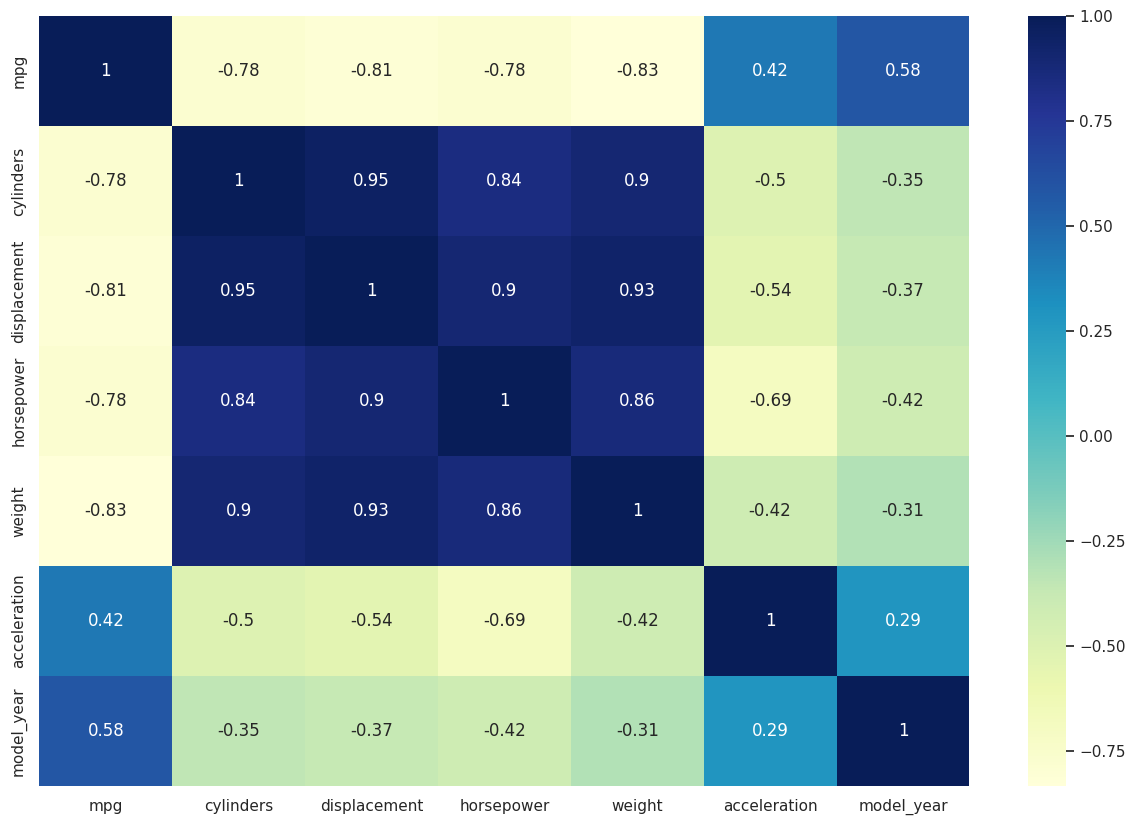

In [14]:
# 相関係数を表示
corr_columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year']
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df_auto2[corr_columns].corr(), annot=True, cmap="YlGnBu")
plt.show()

- 各変数かなり相関が高い
- シリンダー、排気量、馬力、重量はほとんど同じ変数ですね。マルチコ起きそう。
- 加速との相関がやや落ちるのは、上記以外の他の要素（例えば軽い素材を使用したり、エンジンの世代など）が反映されていない可能性はありそう
- 年との相関がわりと強めにあるのも特徴的ですね。わずか１０年ほどのデータですが、その間ですごく進化したのでしょう。

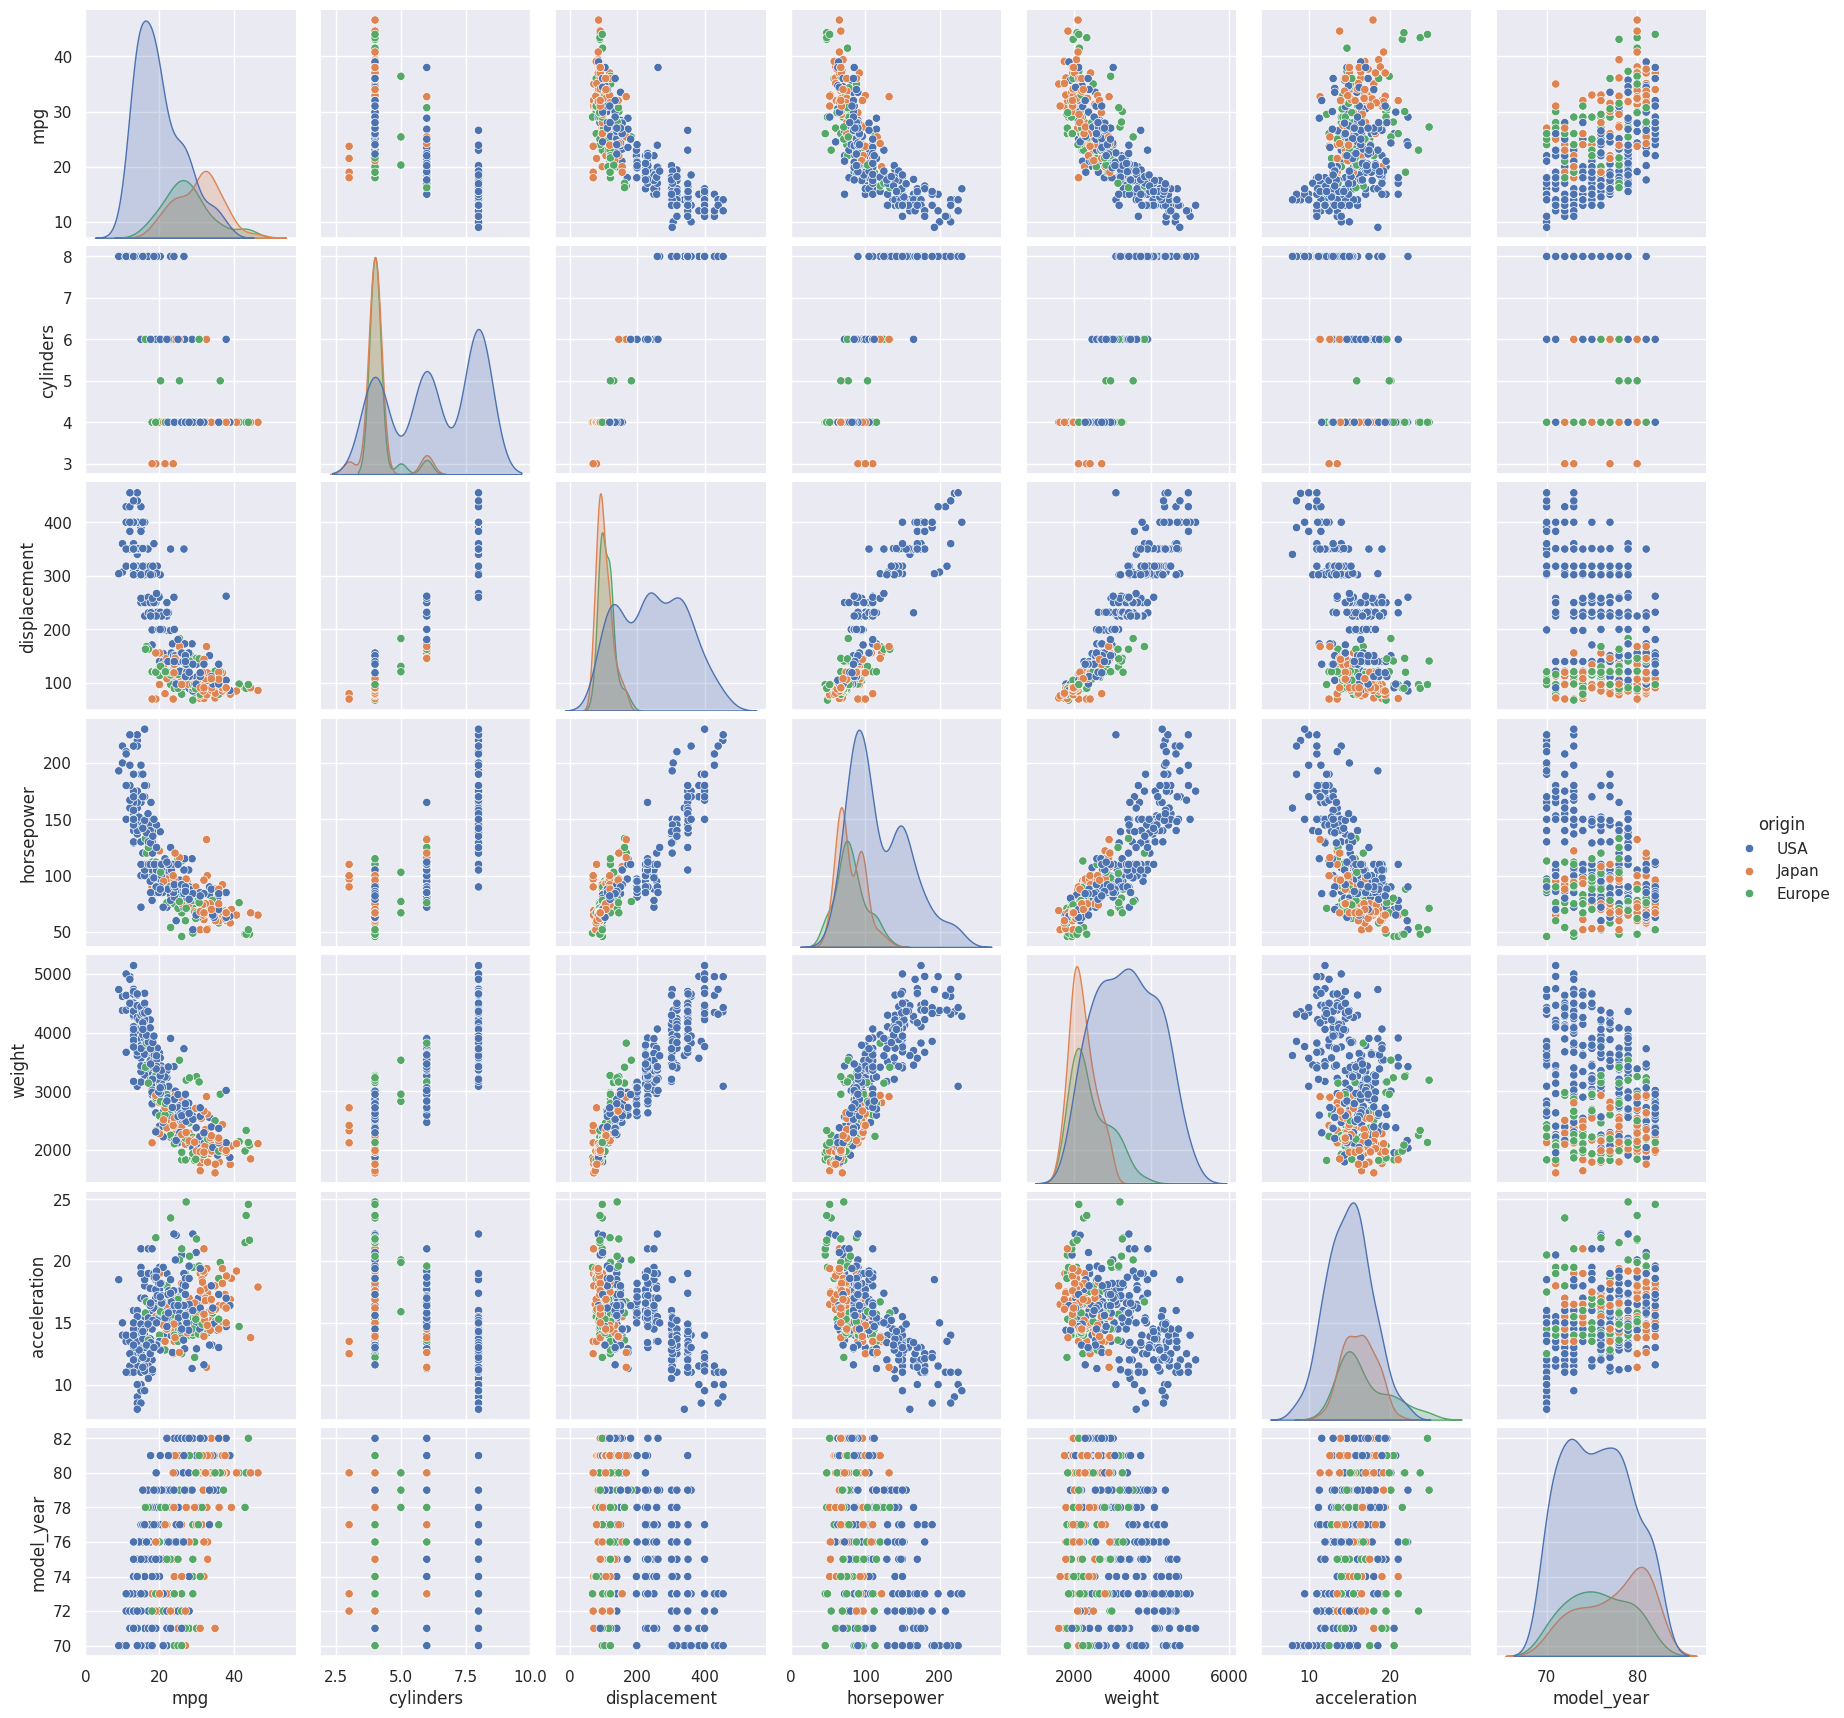

In [15]:
# 種別で層別してplot
pairplot_columns1 = corr_columns + ['origin']
sns.pairplot(df_auto2[pairplot_columns1], hue='origin')

- USAの燃費の悪さが際立ちますね
- USA以外はシリンダはほとんどが4のようです。これも影響していそう。
- 他の、排気量、馬力、重量に関してもUSAだけ値が大きいです。

<Axes: >

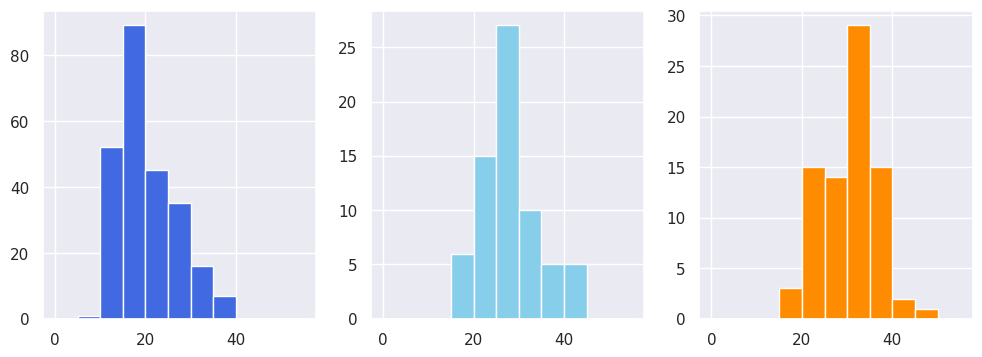

In [19]:
# ヒストグラムの表示
bins_range = range(0,60,5)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
df_auto2[df_auto2['origin'] == 'USA']['mpg'].hist(color='royalblue', bins=bins_range, ax=axes[0])
df_auto2[df_auto2['origin'] == 'Europe']['mpg'].hist(color='skyblue', bins=bins_range, ax=axes[1])
df_auto2[df_auto2['origin'] == 'Japan']['mpg'].hist(color='darkorange', bins=bins_range, ax=axes[2])        

- USAは20 m/G 以下にピークがあるのに対し、Europeは 25～30 m/G、Japanは 30～35 m/G にピークが有り、地域によって燃費にかなりの差があることがわかる。

---
---
---
---
---